# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [5]:
import numpy
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

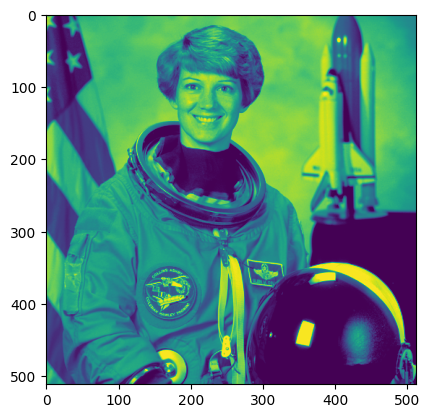

In [6]:
astro = plt.imread('data/astronaut.png')
plt.imshow(astro)

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [7]:
def meanfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        neighborhood_sum = 0
        if n <= p[0] < img.shape[0] - n and n <= p[1] < img.shape[1] - n:
            for q in numpy.ndindex(size, size):
                neighborhood_sum = img[p[0]+ q[0]-n, p[1]+ q[1]-n] + neighborhood_sum
                mean = neighborhood_sum/ size**2
                result[p]= mean
            
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

In [8]:
meanfilter(astro, 5)

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.63937256, ..., 0.464     , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.66368629, ..., 0.05835294, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [9]:
astro1 = meanfilter(astro, 5)
astromean = plt.imread('data/astronaut_meanfilter5.png')
assert numpy.allclose(astro1, astromean, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [10]:
def medianfilter(img, size):
    result = numpy.zeros(img.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img.shape):
        data = []
        if n <= p[0] < img.shape[0] - n and n <= p[1] < img.shape[1] - n:
            for q in numpy.ndindex(size, size):
                data.append(img[p[0]+ q[0]-n, p[1]+ q[1]-n])
            data.sort()
            result[p]= data[(size**2)//2]
    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

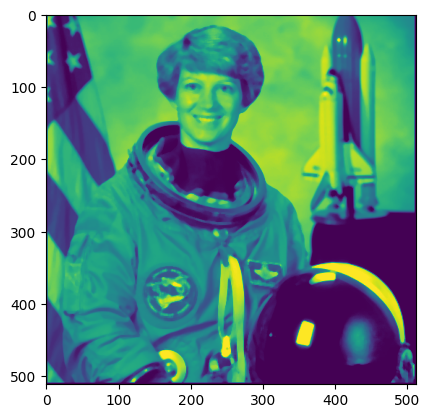

In [11]:
plt.imshow(medianfilter(astro, 5))

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [12]:
astro3 = medianfilter(astro, 5)
astromedian = plt.imread('data/astronaut_medianfilter5.png')
assert numpy.allclose(astro3, astromedian, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [13]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

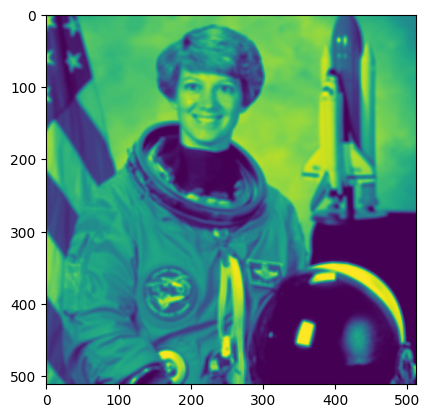

In [14]:
plt.imshow(scipy.ndimage.uniform_filter(astro, 5))

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

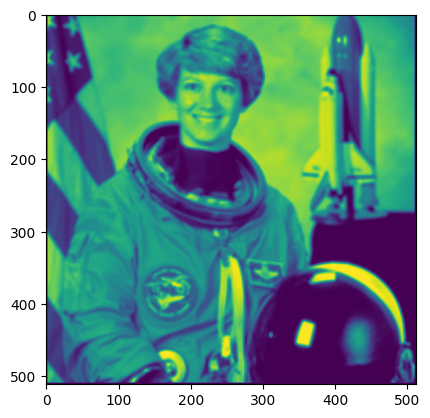

In [17]:
plt.imshow(scipy.ndimage.median_filter(astro,5))
plt.imshow(astro1)

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

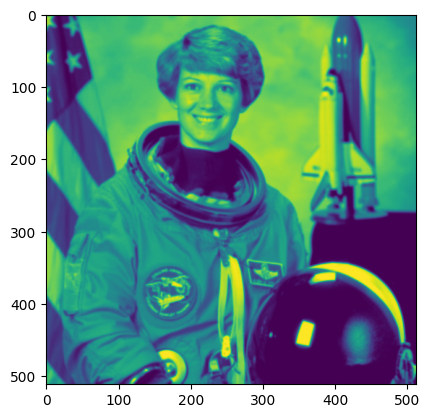

In [16]:
plt.imshow(scipy.ndimage.gaussian_filter(astro, 1))

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

In [ ]:
# our filters from tasks 1 and 2 are slower than the implemented filter functions from scipy

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img, size):
    # write your code here

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: